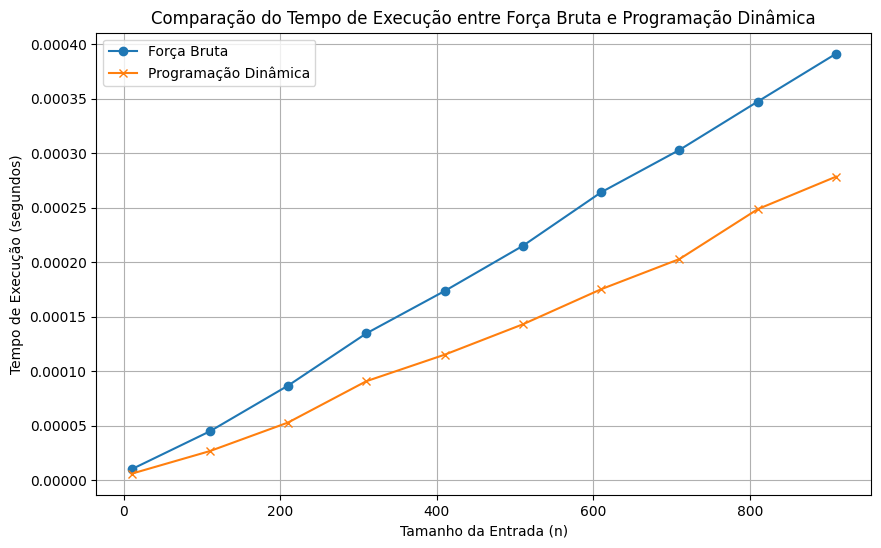

In [1]:
import time
import matplotlib.pyplot as plt

# Função para a Força Bruta
def mochila_forca_bruta(capacidade, pesos, valores):
    n = len(pesos)
    max_valor = 0
    for i in range(capacidade + 1):
        valor = 0
        peso_restante = i
        for j in range(n):
            valor += (peso_restante // pesos[j]) * valores[j]
            peso_restante = peso_restante % pesos[j]
        max_valor = max(max_valor, valor)
    return max_valor

# Função para Programação Dinâmica
def mochila_programacao_dinamica(capacidade, pesos, valores):
    n = len(pesos)
    dp = [0] * (capacidade + 1)
    for i in range(n):
        for w in range(pesos[i], capacidade + 1):
            dp[w] = max(dp[w], dp[w - pesos[i]] + valores[i])
    return dp[capacidade]

# Função para medir tempo de execução
def medir_tempo_execucao(capacidade, pesos, valores):
    tamanhos_entrada = list(range(10, 1001, 100))  # Tamanhos de entrada de 10 até 1000 com intervalos de 100
    tempos_forca_bruta = []
    tempos_programacao_dinamica = []
    
    for n in tamanhos_entrada:
        # Medindo tempo de execução da Força Bruta
        start_time = time.time()
        mochila_forca_bruta(n, pesos, valores)
        end_time = time.time()
        tempos_forca_bruta.append(end_time - start_time)
        
        # Medindo tempo de execução da Programação Dinâmica
        start_time = time.time()
        mochila_programacao_dinamica(n, pesos, valores)
        end_time = time.time()
        tempos_programacao_dinamica.append(end_time - start_time)
    
    return tamanhos_entrada, tempos_forca_bruta, tempos_programacao_dinamica

# Definindo os itens para o teste
pesos = [3, 2, 1]  # Pesos dos itens
valores = [6, 3, 2]  # Valores dos itens
capacidade = 1000  # Capacidade máxima da mochila

# Medindo os tempos de execução
tamanhos_entrada, tempos_forca_bruta, tempos_programacao_dinamica = medir_tempo_execucao(capacidade, pesos, valores)

# Gerando o gráfico de comparação
plt.figure(figsize=(10, 6))
plt.plot(tamanhos_entrada, tempos_forca_bruta, label='Força Bruta', marker='o')
plt.plot(tamanhos_entrada, tempos_programacao_dinamica, label='Programação Dinâmica', marker='x')
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Tempo de Execução (segundos)')
plt.title('Comparação do Tempo de Execução entre Força Bruta e Programação Dinâmica')
plt.legend()
plt.grid(True)
plt.show()
